# Circuit: 3 qbit enjoy!
states 000, 001,..111

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import math
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
import math
from qiskit.visualization import plot_distribution

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])



    
print(circuit)




#print('q0:', circuit)

               ┌───┐
q_0: ──■────■──┤ H ├
       │  ┌─┴─┐└───┘
q_1: ──■──┤ X ├─────
     ┌─┴─┐└───┘     
q_2: ┤ X ├──────────
     └───┘          
c: 3/═══════════════
                    


## Draw circuit as plot

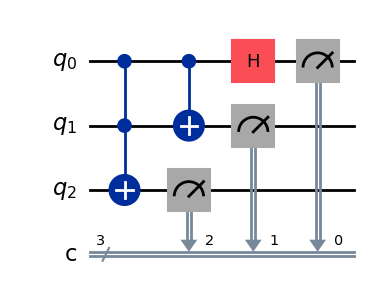

In [2]:


circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

circuit.draw('mpl')


## Draw circuit in latex

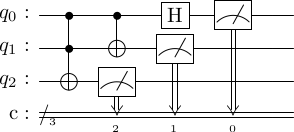

In [3]:
circuit.draw('latex')


### Plot - Simulation with FakeManilaV2 - transpiled

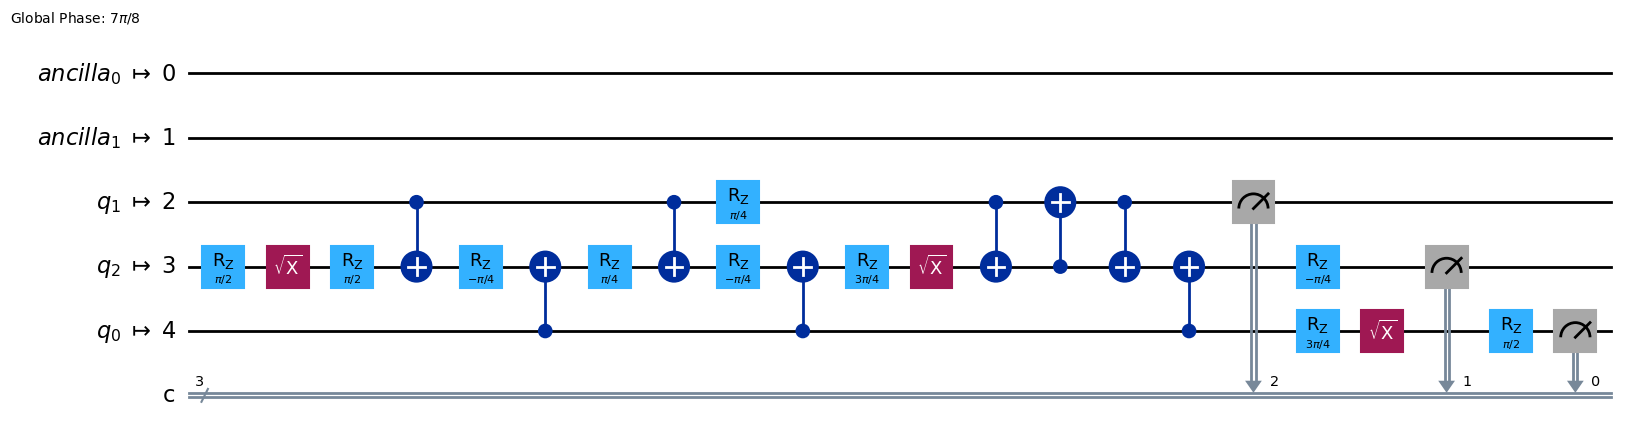

In [4]:
#from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Get a fake backend from the fake provider
backend = FakeManilaV2()
 

 
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl', style="iqp")


###  FakeManilaV2 - histogram on transpiled circuit using the simulated fake backend

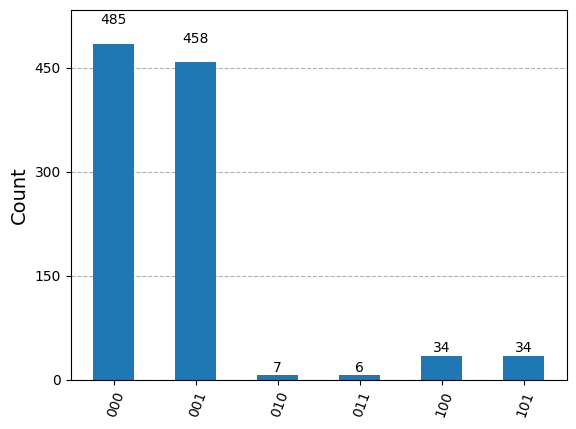

In [5]:
 
# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

## Using AerSimulator

In [6]:
from qiskit_aer import AerSimulator
import math

shts = 1000
# Construct an ideal simulator
aersim = AerSimulator()
# Perform an ideal simulation
result_ideal = aersim.run(circuit,shots=shts).result()
counts_aersim = result_ideal.get_counts() 
print('Counts(ideal):', counts_aersim )

Counts(ideal): {'001': 512, '000': 488}


#### Plot AerSimulator

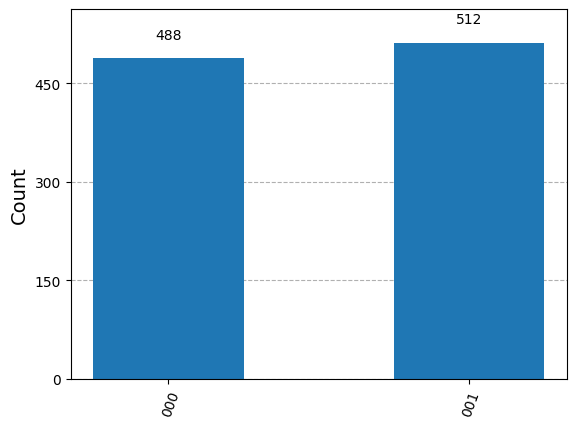

In [7]:
plot_histogram(counts_aersim)

### Plot distribution, normalized histogram

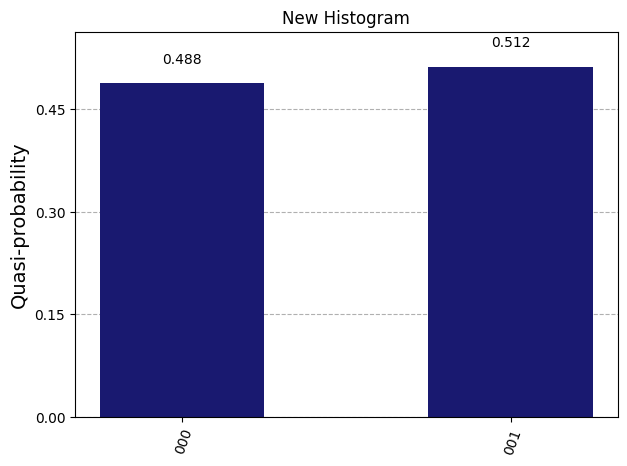

In [8]:
from qiskit.visualization import plot_distribution
counts = counts_aersim
plot_distribution(counts, color='midnightblue', title="New Histogram")

### Decompose

               ┌───┐┌─┐
q_0: ──■────■──┤ H ├┤M├
       │  ┌─┴─┐└┬─┬┘└╥┘
q_1: ──■──┤ X ├─┤M├──╫─
     ┌─┴─┐└┬─┬┘ └╥┘  ║ 
q_2: ┤ X ├─┤M├───╫───╫─
     └───┘ └╥┘   ║   ║ 
c: 3/═══════╩════╩═══╩═
            2    1   0 


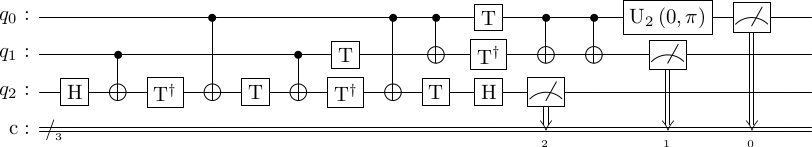

In [9]:
decomposed_circuit = circuit.decompose()
print(circuit)
decomposed_circuit.draw('latex')


### My Session Token!

In [10]:
# %%script echo skipping

from qiskit_ibm_runtime import QiskitRuntimeService

# For an IBM Cloud account.
#ibm_cloud_service = QiskitRuntimeService(channel="ibm_cloud", token="MY_IBM_CLOUD_API_KEY", instance="MY_IBM_CLOUD_CRN")

# For an IBM Quantum account.
ibm_quantum_service = QiskitRuntimeService(channel="ibm_quantum", token="5c74bcbf128a6eb04bddH67qf75f55aba63395710f8e0bb087f1482f6c4042522cf958f1b25f93f84ffde24241fe54f0ba6bea6b1cb75a8326351dfd5ce15414")

### See for Backends

In [11]:
# from a real backend.

backends = ibm_quantum_service.backends()
print([backend.name for backend in backends])



['ibm_brisbane', 'ibm_kyiv', 'ibm_sherbrooke']


### Primitive version2 - Sampler

In [12]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

service = ibm_quantum_service

# 1. A quantum circuit for preparing the quantum state (|00> + |11>)/rt{2}
bell = circuit
bell.measure_all()

# 2: Optimize problem for quantum execution.
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(bell)

# 3. Execute using the Sampler primitive
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1024  # Options can be set using auto-complete.
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
pub_result = job.result()[0]

counts = pub_result.data.meas.get_counts()
print(f"Counts for the meas output register: {counts}")

Job ID is czw3764rxz8g008etgmg
Counts for the meas output register: {'000': 472, '001': 404, '010': 51, '110': 13, '011': 65, '101': 6, '111': 6, '100': 7}


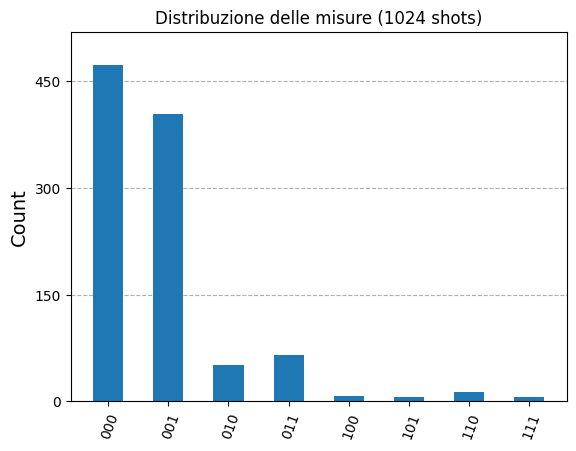

In [13]:
plot_histogram(counts, title="Distribuzione delle misure (1024 shots)", bar_labels=False)